In [3]:
import requests
import time
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd


In [183]:
with open('API_key.txt') as f:
    api_key = f.read()

In [ ]:
API_KEY = api_key
BASE_URL = 'http://quickstats.nass.usda.gov/api/api_GET/'
OUTPUT_DIR = 'corn_yield_csv'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Select years for collection
START_YEAR = 1910
END_YEAR = 2024

for year in range(START_YEAR, END_YEAR + 1):
    params = {
        'key': API_KEY,
        'commodity_desc': 'CORN',
        'statisticcat_desc': 'YIELD',
        'unit_desc': 'BU / ACRE',
        'agg_level_desc': 'COUNTY',
        'year': year,
        'format': 'JSON'
    }

    try:
        print(f"Downloading data for year {year}...")
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()
        data = response.json()

        records = data.get('data', [])
        if not records:
            print(f"No data for {year}, next.")
            continue

        df = pd.DataFrame(records)

        # Salva CSV per l'anno
        csv_path = os.path.join(OUTPUT_DIR, f"corn_yield_{year}_county.csv")
        df.to_csv(csv_path, index=False)
        print(f"Saved {csv_path} with {len(df)} record.")
        time.sleep(3)  

    except requests.exceptions.RequestException as e:
        print(f"Error for year {year}: {e}")
        time.sleep(5)

In [ ]:
INPUT_DIR = 'corn_yield_csv'
OUTPUT_FILE = 'corn_yield_all_years_county.csv'

files = [os.path.join(INPUT_DIR, f) for f in os.listdir(INPUT_DIR) if f.endswith('.csv')]
dfs = []

for file in sorted(files):
    print(f"Loading {file}...")
    df = pd.read_csv(file)

    # clean the 'Value' column
    def clean_value(val):
        try:
            return float(str(val).replace(",", ""))
        except:
            return None
    df['Value'] = df['Value'].apply(clean_value)

    dfs.append(df)

if dfs:
    full_df = pd.concat(dfs, ignore_index=True)
    full_df.to_csv(OUTPUT_FILE, index=False)
    print(f"Dataset complete saved in '{OUTPUT_FILE}'.")
else:
    print("There are no files to assemble")

Loading corn_yield_csv\corn_yield_1910_county.csv...
Loading corn_yield_csv\corn_yield_1911_county.csv...
Loading corn_yield_csv\corn_yield_1912_county.csv...
Loading corn_yield_csv\corn_yield_1913_county.csv...
Loading corn_yield_csv\corn_yield_1914_county.csv...
Loading corn_yield_csv\corn_yield_1915_county.csv...
Loading corn_yield_csv\corn_yield_1916_county.csv...
Loading corn_yield_csv\corn_yield_1917_county.csv...
Loading corn_yield_csv\corn_yield_1918_county.csv...
Loading corn_yield_csv\corn_yield_1919_county.csv...
Loading corn_yield_csv\corn_yield_1920_county.csv...
Loading corn_yield_csv\corn_yield_1921_county.csv...
Loading corn_yield_csv\corn_yield_1922_county.csv...
Loading corn_yield_csv\corn_yield_1923_county.csv...
Loading corn_yield_csv\corn_yield_1924_county.csv...
Loading corn_yield_csv\corn_yield_1925_county.csv...
Loading corn_yield_csv\corn_yield_1926_county.csv...
Loading corn_yield_csv\corn_yield_1927_county.csv...
Loading corn_yield_csv\corn_yield_1928_county.

In [4]:
df = pd.read_csv('corn_yield_all_years_county.csv')

In [5]:
df.describe()

,region_desc,state_fips_code,country_code,state_ansi,week_ending,county_code,county_ansi,congr_district_code,end_code,begin_code,Value,watershed_desc,watershed_code,CV (%),year,zip_5,asd_code
count,0.0,221557.000000,221557.0,221557.000000,0.0,221557.000000,213879.000000,0.0,221557.0,221557.0,221557.000000,0.0,221557.0,7506.000000,221557.000000,0.0,221557.000000
mean,NaN,30.088032,9000.0,30.088032,NaN,124.446865,93.087353,NaN,0.0,0.0,81.044844,NaN,0.0,5.555622,1978.090415,NaN,49.885844
std,NaN,13.262452,0.0,13.262452,NaN,179.477601,70.645899,NaN,0.0,0.0,48.957053,NaN,0.0,4.511936,25.600817,NaN,25.498104
min,NaN,1.000000,9000.0,1.000000,NaN,1.000000,1.000000,NaN,0.0,0.0,0.000000,NaN,0.0,0.500000,1910.000000,NaN,10.000000
25%,NaN,20.000000,9000.0,20.000000,NaN,41.000000,39.000000,NaN,0.0,0.0,40.000000,NaN,0.0,2.700000,1960.000000,NaN,30.000000
50%,NaN,29.000000,9000.0,29.000000,NaN,87.000000,83.000000,NaN,0.0,0.0,73.600000,NaN,0.0,4.100000,1980.000000,NaN,50.000000
75%,NaN,39.000000,9000.0,39.000000,NaN,139.000000,133.000000,NaN,0.0,0.0,114.600000,NaN,0.0,6.900000,1998.000000,NaN,70.000000
max,NaN,56.000000,9000.0,56.000000,NaN,998.000000,810.000000,NaN,0.0,0.0,296.300000,NaN,0.0,63.400000,2024.000000,NaN,99.000000


In [6]:
df.columns

Index(['source_desc', 'region_desc', 'group_desc', 'agg_level_desc',
       'state_name', 'country_name', 'statisticcat_desc', 'domaincat_desc',
       'state_fips_code', 'country_code', 'sector_desc', 'state_ansi',
       'week_ending', 'county_code', 'prodn_practice_desc', 'county_ansi',
       'reference_period_desc', 'congr_district_code', 'unit_desc', 'end_code',
       'asd_desc', 'load_time', 'begin_code', 'Value', 'domain_desc',
       'util_practice_desc', 'watershed_desc', 'short_desc', 'watershed_code',
       'class_desc', 'commodity_desc', 'freq_desc', 'county_name', 'CV (%)',
       'state_alpha', 'location_desc', 'year', 'zip_5', 'asd_code'],
      dtype='object')

In [7]:
interest_columns = ['year','country_name','state_name','county_name','Value']

In [8]:
df = df.loc[:, interest_columns]

In [9]:
df.isna().sum()

year            0
country_name    0
state_name      0
county_name     0
Value           0
dtype: int64

In [11]:
# Groupby for state and year
state_df = df.groupby(['year', 'state_name'])['Value'].mean().reset_index()

# For national average
national_df = df.groupby(['year'])['Value'].mean().reset_index()

In [12]:
df.head()

,year,country_name,state_name,county_name,Value
0,1910,UNITED STATES,NEBRASKA,BANNER,14.4
1,1910,UNITED STATES,NEBRASKA,BOX BUTTE,16.0
2,1910,UNITED STATES,NEBRASKA,CHEYENNE,9.6
3,1910,UNITED STATES,NEBRASKA,DAWES,16.4
4,1910,UNITED STATES,NEBRASKA,DEUEL,17.5


In [13]:
df['state_name'].unique()

array(['NEBRASKA', 'OHIO', 'MISSOURI', 'NORTH DAKOTA', 'MINNESOTA',
       'SOUTH DAKOTA', 'ILLINOIS', 'NORTH CAROLINA', 'IOWA',
       'WEST VIRGINIA', 'DELAWARE', 'MARYLAND', 'WISCONSIN', 'INDIANA',
       'KENTUCKY', 'OKLAHOMA', 'ALABAMA', 'WASHINGTON', 'MICHIGAN',
       'MONTANA', 'SOUTH CAROLINA', 'MISSISSIPPI', 'NEW JERSEY',
       'GEORGIA', 'TENNESSEE', 'WYOMING', 'NEW MEXICO', 'OREGON',
       'KANSAS', 'VIRGINIA', 'CALIFORNIA', 'LOUISIANA', 'PENNSYLVANIA',
       'ARKANSAS', 'FLORIDA', 'COLORADO', 'ARIZONA', 'TEXAS', 'IDAHO',
       'NEW YORK', 'UTAH'], dtype=object)

ERROR 1: PROJ: proj_create_from_database: Open of /cluster/raid/home/f89600179/miniforge3/share/proj failed


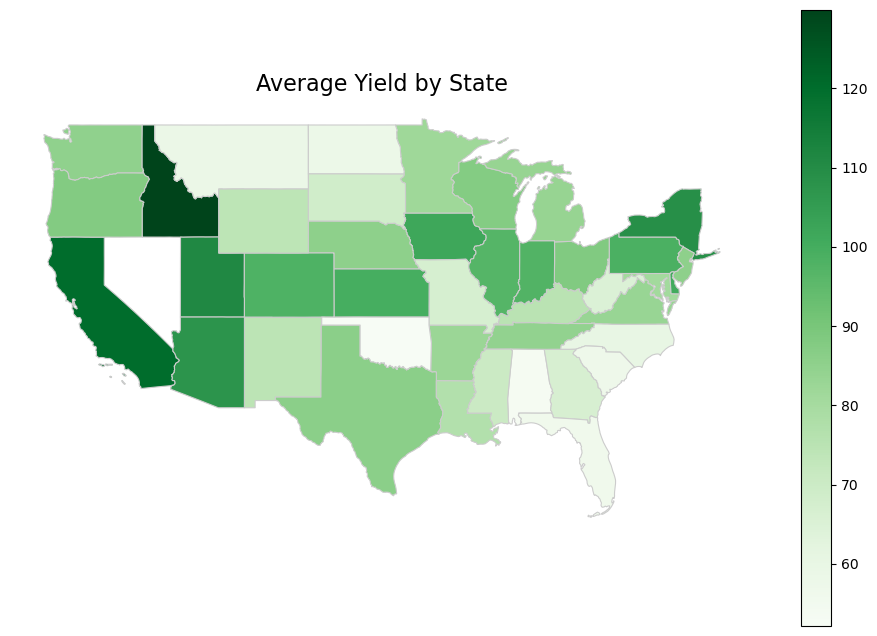

In [14]:
# Group by state to get average yield across all years
state_avg_yield = df.groupby('state_name')['Value'].mean().reset_index()

# Load US state shapefile (download from Census if needed)
states = gpd.read_file("cb_2018_us_state_20m.zip")

# Ensure consistent casing for merge
states['NAME'] = states['NAME'].str.upper()
state_avg_yield['state_name'] = state_avg_yield['state_name'].str.upper()

# Merge data
merged = states.merge(state_avg_yield, left_on='NAME', right_on='state_name')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Value', cmap='Greens', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
ax.set_title('Average Yield by State', fontsize=16)
ax.axis('off')
plt.show()

In [15]:
df['Value'].describe()

count    221557.000000
mean         81.044844
std          48.957053
min           0.000000
25%          40.000000
50%          73.600000
75%         114.600000
max         296.300000
Name: Value, dtype: float64

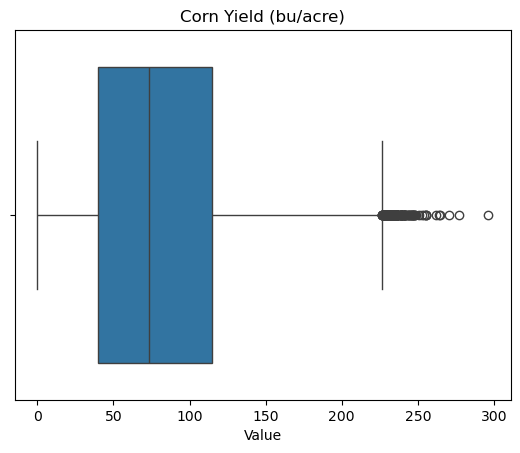

In [16]:
sns.boxplot(df['Value'], orient='h')
plt.title('Corn Yield (bu/acre)')
plt.show()

In [19]:
hist_wx_df = pd.read_parquet('hist_wx_df.parquet')

In [20]:
hist_wx_df.head()

,aoi_id,date,tmax,tmin,precip,swvl1,swvl2,adm2_name,adm1_name
0,USA.14.100_1,2000-01-01,9.146448,-0.300685,0.000000,0.333584,0.316295,Will,Illinois
1,USA.14.100_1,2000-01-02,16.077440,4.774050,0.000000,0.343324,0.317686,Will,Illinois
2,USA.14.100_1,2000-01-03,9.560367,1.645247,0.466668,0.342535,0.320476,Will,Illinois
3,USA.14.100_1,2000-01-04,3.089767,-3.193717,1.183839,0.379731,0.338481,Will,Illinois
4,USA.14.100_1,2000-01-05,-1.597997,-8.902274,0.000000,0.353221,0.343165,Will,Illinois


In [22]:
hist_wx_df.describe().round(2)

,date,tmax,tmin,precip,swvl1,swvl2
count,8527402,8527402.00,8527402.00,8527402.00,8527402.00,8527402.00
mean,2012-03-02 03:27:13.931177984,16.46,6.88,2.36,0.32,0.32
min,2000-01-01 00:00:00,-32.29,-41.80,0.00,0.05,0.06
25%,2006-02-01 00:00:00,7.55,-1.34,0.00,0.27,0.26
50%,2012-03-03 00:00:00,17.97,7.70,0.00,0.34,0.33
75%,2018-04-02 00:00:00,26.25,16.38,1.50,0.38,0.38
max,2024-04-30 00:00:00,44.19,31.56,224.63,0.63,0.63
std,NaN,11.63,11.14,6.34,0.08,0.08


In [23]:
hist_wx_df.isnull().sum()

aoi_id       0
date         0
tmax         0
tmin         0
precip       0
swvl1        0
swvl2        0
adm2_name    0
adm1_name    0
dtype: int64

<Axes: xlabel='tmax'>

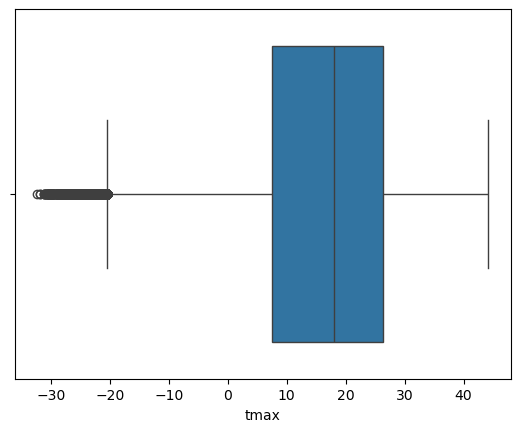

In [24]:
sns.boxplot(hist_wx_df['tmax'], orient='h')

<Axes: xlabel='tmin'>

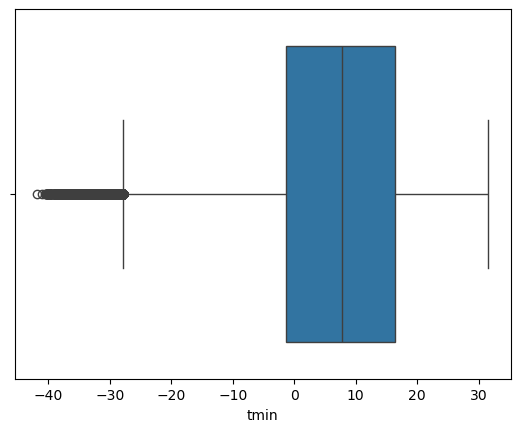

In [25]:
sns.boxplot(hist_wx_df['tmin'], orient='h')

The box plot you show clearly highlights a common problem in precipitation data:
the presence of very high outliers and a strongly asymmetrical (skewed) distribution because probabily there a lot of days without rain.

<Axes: xlabel='precip'>

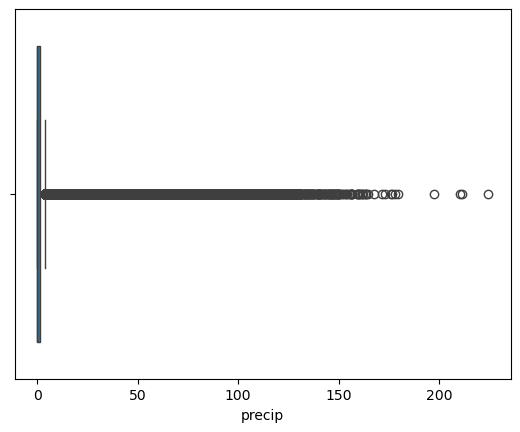

In [26]:
sns.boxplot(hist_wx_df['precip'], orient='h')

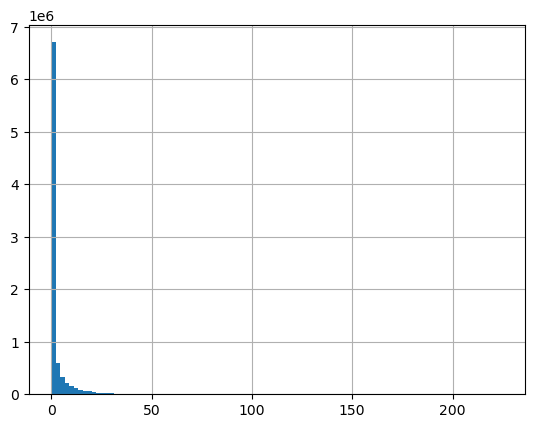

In [27]:
hist_wx_df['precip'].hist(bins=100)
plt.show()

In [28]:
hist_wx_df['rain_flag'] = pd.cut(
    hist_wx_df['precip'],
    bins=[-0.1, 0, 50, float('inf')],
    labels=[0, 1, 2],
    right=True
).astype(int)

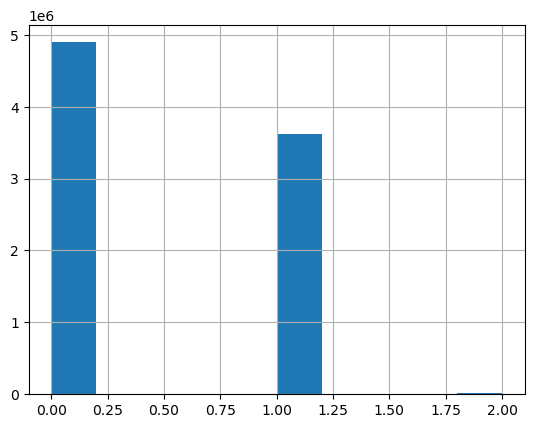

In [29]:
hist_wx_df['rain_flag'].hist()
plt.show()

In [30]:
ts = df.set_index('year')

In [31]:
ts_yield = pd.Series(ts['Value'])

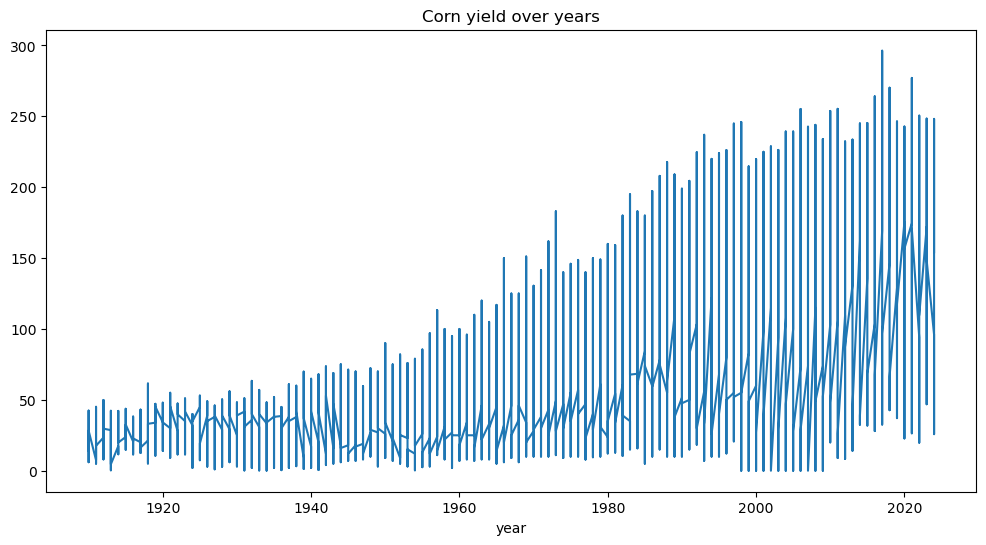

In [32]:
ts_yield.plot(legend=False, title='Corn yield over years', figsize=(12, 6))
plt.show()

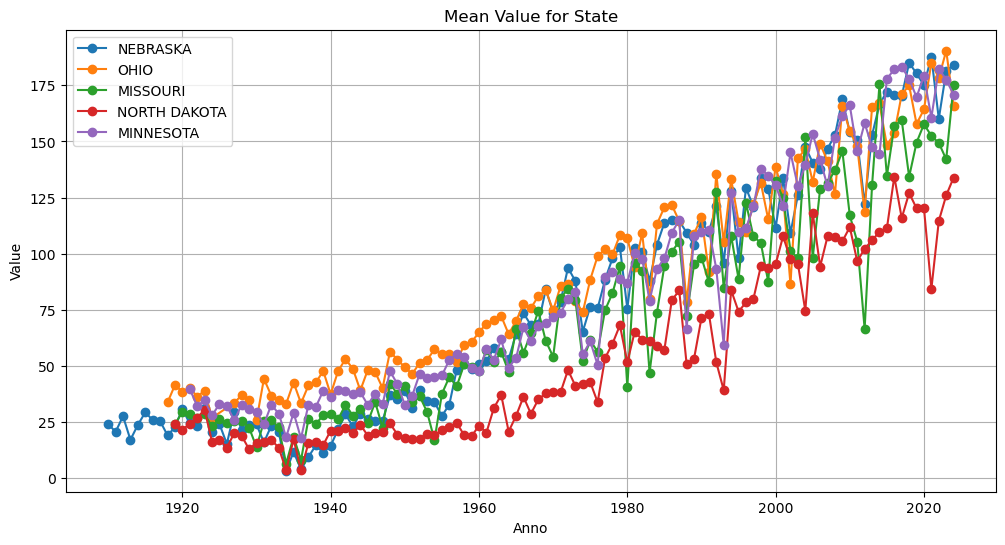

In [33]:
# Series for state
state_time_series = df.groupby(['year', 'state_name'])['Value'].mean().reset_index()

# Graph for the firts 10 states
states_to_plot = state_time_series['state_name'].unique()[:5]  

plt.figure(figsize=(12, 6))
for state in states_to_plot:
    data = state_time_series[state_time_series['state_name'] == state]
    plt.plot(data['year'], data['Value'], marker='o', label=state)

plt.title("Mean Value for State")
plt.xlabel("Anno")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

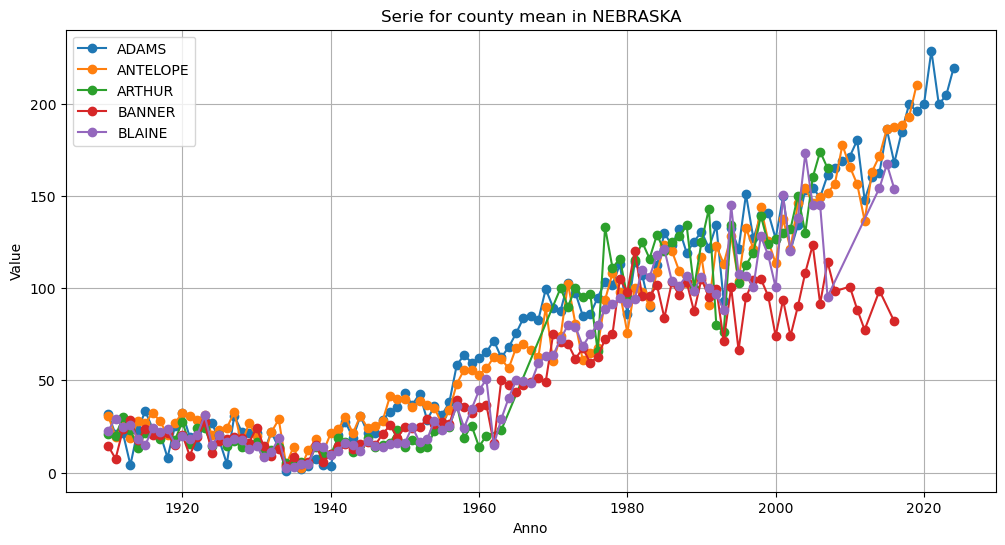

In [34]:
# Serie for county in a specific state
state_example = 'NEBRASKA'
county_time_series = df[df['state_name'] == state_example].groupby(['year', 'county_name'])['Value'].mean().reset_index()

# Selezioniamo alcuni county per il grafico (massimo 5)
counties_to_plot = county_time_series['county_name'].unique()[:5]

plt.figure(figsize=(12, 6))
for county in counties_to_plot:
    data = county_time_series[county_time_series['county_name'] == county]
    plt.plot(data['year'], data['Value'], marker='o', label=county)

plt.title(f"Serie for county mean in {state_example}")
plt.xlabel("Anno")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

## Timeseries

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [36]:
ts = national_df.set_index('year')
ts_yield = pd.Series(ts['Value'])

In [37]:
ts_yield.isna().sum()

np.int64(0)

In [38]:
ts_yield

year
1910     24.149462
1911     20.627957
1912     27.587097
1913     17.106452
1914     23.718280
           ...    
2020    155.028303
2021    163.246946
2022    153.514138
2023    165.174915
2024    155.005130
Name: Value, Length: 115, dtype: float64

In [39]:
type(ts_yield)

pandas.core.series.Series

In [40]:
ts_yield.index

Index([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       ...
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype='int64', name='year', length=115)

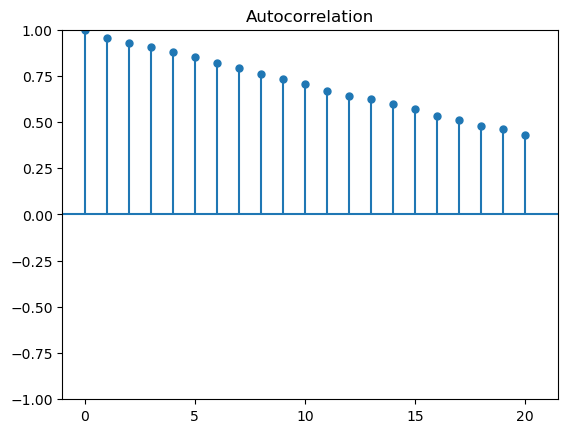

In [41]:
plot_acf(ts_yield.values[11:], lags=20, alpha=1)
plt.show()

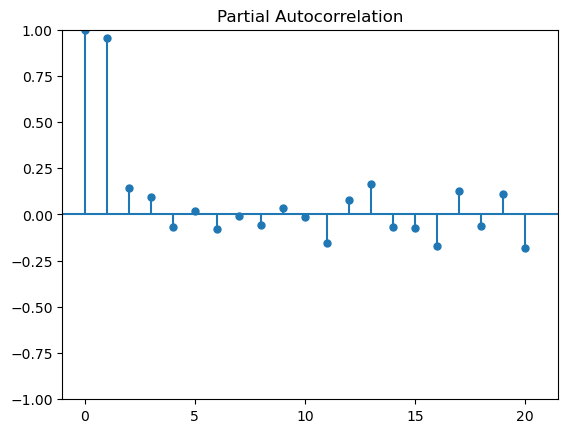

In [42]:
plot_pacf(ts_yield.values[11:], lags=20, alpha=1)
plt.show()

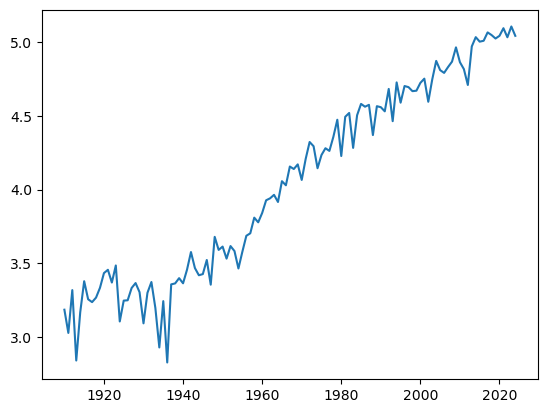

In [43]:
ts_log = pd.Series(np.log(ts_yield))
plt.plot(ts_log)
plt.show()

<Axes: xlabel='year'>

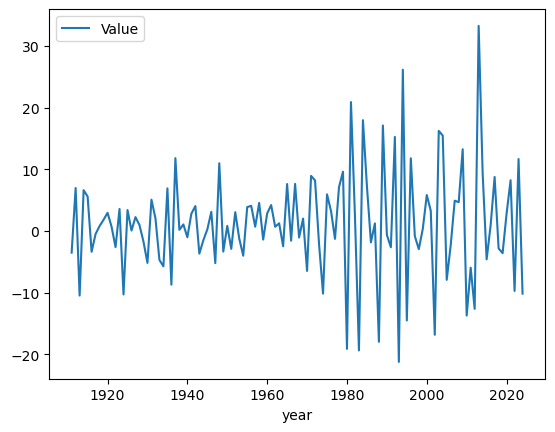

In [44]:
trend = ts.diff() 
trend.plot()


In [45]:
# Convert the index to datetime
ts_yield.index = pd.to_datetime(ts_yield.index,  format='%Y')

# Check the result
print(ts_yield)
print(type(ts_yield.index))

year
1910-01-01     24.149462
1911-01-01     20.627957
1912-01-01     27.587097
1913-01-01     17.106452
1914-01-01     23.718280
                 ...    
2020-01-01    155.028303
2021-01-01    163.246946
2022-01-01    153.514138
2023-01-01    165.174915
2024-01-01    155.005130
Name: Value, Length: 115, dtype: float64
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [46]:
# Check for missing data:
print(ts_yield.isna().sum())

0
